# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Jan Häusler, 330982
    2. Philipp Heisenberger, 345594
    3.

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read from disk
data_non_sampled = pd.read_csv('population_density.csv')

# sample 90% of rows, using student id as seed
data_preprocessed = data_non_sampled.sample(frac=0.9, random_state=330982)

# function to map population values to categories
def density_to_category(row):
    if row['population_density'] >= 5824:
        return 'very high'
    elif row['population_density'] >= 4368:
        return 'high'
    elif row['population_density'] >= 2912:
        return 'medium'
    elif row['population_density'] > 1456:
        return 'low'
    else:
        return 'very low'

# create new rows by applying function to each row
data_preprocessed['population_density_categorical'] = data_preprocessed.apply(density_to_category, axis=1)

# export to file
data_preprocessed.to_csv('population_density_categorical.csv')

## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

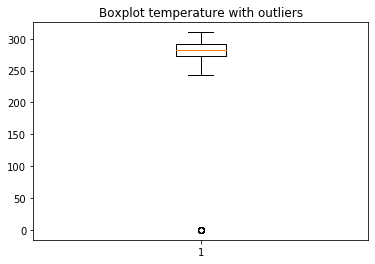

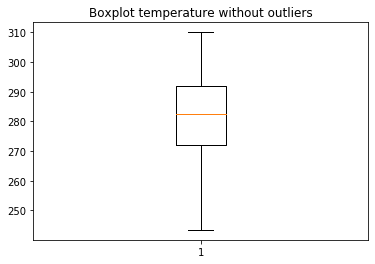

<Figure size 432x288 with 0 Axes>

In [2]:
# create deep copy
data = data_preprocessed.copy()
#boxplot of original data
bpTemp1 = plt.boxplot(data['temperature'])
plt.title("Boxplot temperature with outliers")
plt.figure()
# calculate first and third quartile
q1 = data.quantile(q=0.25)['temperature']
q3 = data.quantile(q=0.75)['temperature']

# calculate the interquartile range
iqr = 1.5*(q3-q1)

# calculate values of whiskers
upperWhisker = q3 + iqr
lowerWhisker = q1 - iqr

# select only rows which lie in whisker range, therefore eliminating outliers
data_cleaned = data.loc[(data['temperature'] > lowerWhisker) & (data['temperature'] < upperWhisker) ]
#boxplot of cleanded data
bpTemp2 = plt.boxplot(data_cleaned['temperature'])
plt.title("Boxplot temperature without outliers")
plt.figure()
# assign dataset conforming to naming specification
data_original = data


   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [3]:
print("Median of original data",data_original.median()['temperature'])
print("Median of cleaned data", data_cleaned.median()['temperature'])
print("Mean of original data", data_original.mean()['temperature'])
print("Mean of cleaned data", data_cleaned.mean()['temperature'])
print("Mode of original data", data_original.mode()['temperature'][0])
print("Mode of cleaned data", data_cleaned.mode()['temperature'][0])

Median of original data 282.46
Median of cleaned data 282.47
Mean of original data 281.19617444219364
Mean of cleaned data 281.26100502605544
Mode of original data 274.15
Mode of cleaned data 274.15


Interpretation of the results: Since all of the outliers have a value of 0, and the rest of the data is greater than ~250, the median and mean shift in the positive direction for the cleaned dataset. The mode stays the same, as 274.15 seems to occur more than the amount of outliers.

   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [4]:
# calculate difference between original and cleaned dataset
outlierDelta = data_original.size - data_cleaned.size

# print it
print("Removed {} rows beyond whiskers.".format(outlierDelta))

Removed 100 rows beyond whiskers.


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

Minimal population_density 519.4 on Columbus Day
Maximal population_density 1356.0 on New Years Day


AttributeError: 'AxesSubplot' object has no attribute 'show'

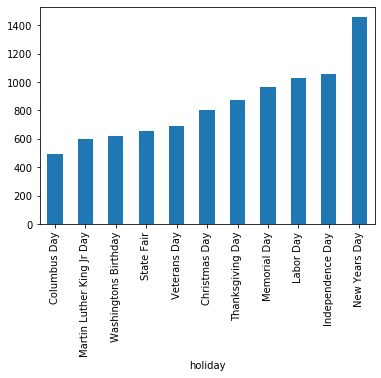

In [12]:
# include only holidays, group the series by holiday column, select population_density row
# and calculate its means and medians
holiday_population_densities = data_original.loc[data_original['holiday'] != 'None'].groupby('holiday')['population_density']
holiday_means = holiday_population_densities.mean()
holiday_means = holiday_means.sort_values()
holiday_medians = holiday_population_densities.median()
holiday_medians = holiday_medians.sort_values()

# calculate means and map corresponding index
minimumMean = holiday_means.min()
minimumMeanHoliday = holiday_means[holiday_means == minimumMean].index[0]
maximumMean = holiday_means.max()
maximumMeanHoliday = holiday_means[holiday_means == maximumMean].index[0]

# print results
print("Minimal population_density {} on {}".format(minimumMean, minimumMeanHoliday))
print("Maximal population_density {} on {}".format(maximumMean, maximumMeanHoliday))

# bar plot medians and means
plt_medians = holiday_medians.plot.bar()
plt_medians.show()
plt_means = holiday_means.plot.bar()
plt_means.show()

   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

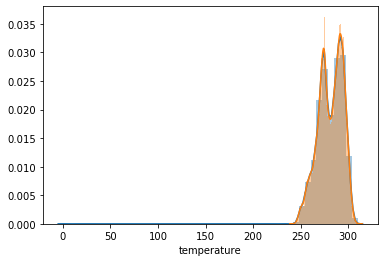

In [8]:
sns.distplot(data_original['temperature'])
sns.distplot(data_cleaned['temperature'])

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

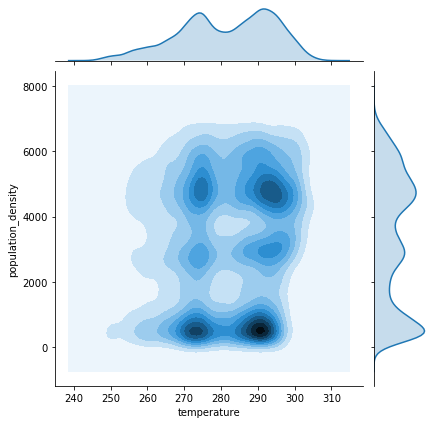

In [9]:
sns.jointplot(data_cleaned['temperature'], data_cleaned['population_density'], kind="kde")

# ranges of "temperature" and "population_density" for which the frequency of the data is the highest

Ranges for which the frequency is the highest: We can find 6 local high density accumulations from the jointplot, rough estimates in the form (temperature, population density):

```
(273, 4800) (290, 4800)  
(273, 2800) (290, 2800)  
(273, 350 ) (290, 350 )  
```

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [13]:
# deep copy as to not affect dataset outside of this question
data = data_cleaned.copy()

# function to map temperature values to categories
def temperature_to_category(row):
    global q1
    global q3
    if row['temperature'] >= q3:
        return 'high'
    elif row['temperature'] <= q1:
        return 'low'
    else:
        return 'medium'

# create new rows by applying function to each row
data['temperature_categorical'] = data.apply(temperature_to_category, axis=1)

   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [14]:
from p_decision_tree.DecisionTree import DecisionTree

columns = data.columns

descriptive_features = ["holiday", "temperature_categorical", "weather_type"]
label = "population_density_categorical"

# converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

In [15]:
# initialize decision tree
decisionTree = DecisionTree(data_descriptive.tolist(),
                            descriptive_features,
                            data_label.tolist(), "entropy")

# run id3 algorithm and split at a minimum of 5k samples
decisionTree.id3(0, 5000)

# visualizing decision tree with graphviz
#dot = decisionTree.print_visualTree( render=True )

print("System entropy: ", format(decisionTree.entropy))
print("System gini: ", format(decisionTree.gini))

System entropy:  2.2315737608512087
System gini:  None


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

In [20]:
sampleIds = [x for x in range(len(data_descriptive.tolist()))]
attributeIds = [x for x in range(len(descriptive_features))]

print("Extracting information gain for each attribute...")
attributesEntropy = [0] * len(attributeIds)
for i, attId in zip(range(len(attributeIds)), attributeIds):
    attributesEntropy[i] = decisionTree.getInformationGain(sampleIds, attId)
print("information gains:  ", attributesEntropy)
print("corresponding names:", decisionTree.attributes)

Extracting information gain for each attribute...
information gains:   [0.00215765849629778, 0.022688461143788197, 0.01864098625303649]
corresponding names: ['holiday', 'temperature_categorical', 'weather_type']


Explanation: Looking at the resulting array of information gains for each descriptive feature, we can see that the second highest value is to be found for 'weather_type', therefore this attribute is used for splitting the tree in the second round.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [21]:
# TODO: what are they referring to with "extracted dataset"?
data = data_preprocessed.copy()

# drop unwanted rows
data = data.drop(columns=['weather_type', 'weather_type_details', 'population_density_categorical'])
def convert_to_hour(date):
    # works for this dataset, since all dates have the
    # same format of MM/dd/yyyy hh:mm
    return int(date.split(" ")[1].split(":")[0])
data['date_time'] = data['date_time'].apply(convert_to_hour)

   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

The `holiday` feature needs to encoded since its categorical and regression can only operate on numerical inputs to fit a regression. Since all other are numerical they are immediately suitable as inputs.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

We use label encoding, because TODO: WHY?

In [22]:
data["holiday"] = data["holiday"].astype("category")
print("holiday mapping:")
print(data["holiday"].cat.categories)

# convert all categorical columns to their codes
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

# one-hot encoding
#one_hot_holidays = pd.get_dummies(data['holiday'],prefix="holiday")
#data = pd.concat([data, one_hot_holidays], axis=1)
#data.drop(['holiday'],axis=1, inplace=True)
#print(data.loc[data['holiday'] != 7])

holiday mapping:
Index(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day', 'None',
       'State Fair', 'Thanksgiving Day', 'Veterans Day',
       'Washingtons Birthday'],
      dtype='object')


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

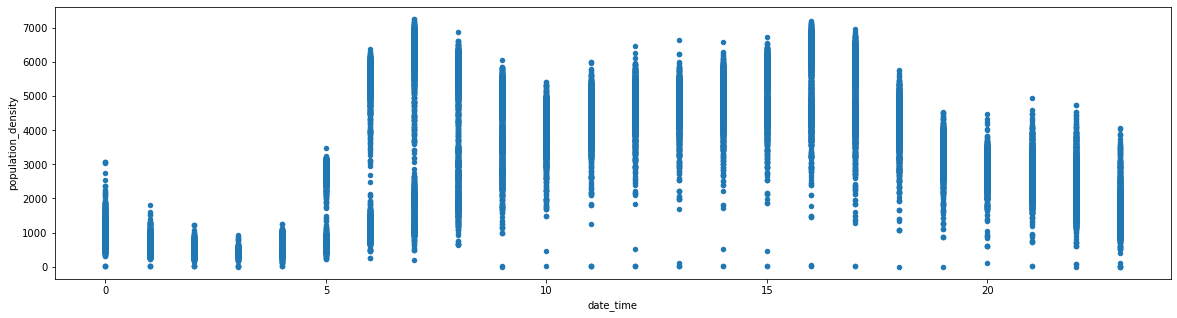

In [23]:
plt.rcParams['agg.path.chunksize'] = 10000
data.plot.scatter(x='date_time', y='population_density', figsize=(20, 5))

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

<ipython-input-24-7b4c13b4e787>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  RegB['date_time'] = RegB['date_time'].apply(move_x_axis)


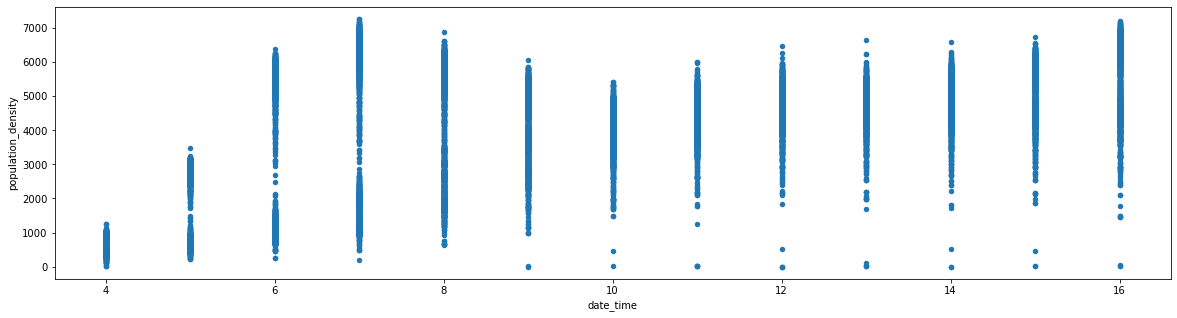

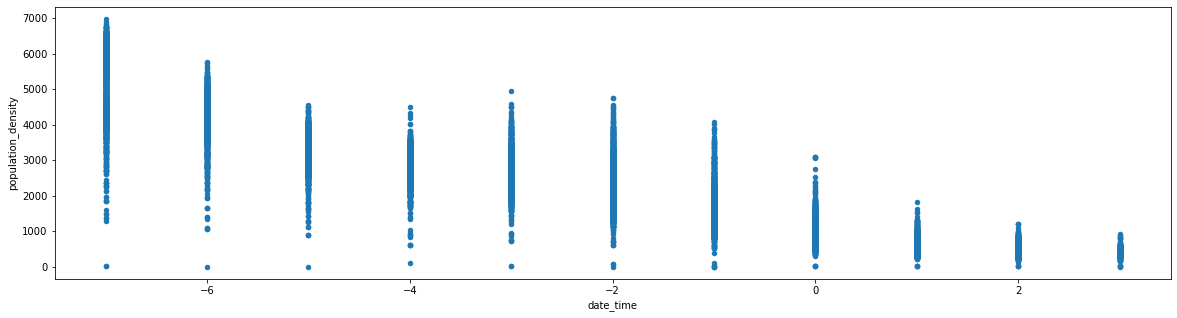

In [24]:
# Your code:

RegA = data.loc[(data['date_time'] > 3) & (data['date_time'] <= 16)]
RegB = data.loc[(data['date_time'] <= 3) | (data['date_time'] > 16)]
#RegA = data.loc[(data['temperature'] > 282.46)]
#RegB = data.loc[(data['temperature'] <= 282.46)]
#RegA = data.loc[(data['clouds_percentage'] > 64)]
#RegB = data.loc[(data['clouds_percentage'] <= 64)]

#RegB.corr()

RegA.plot.scatter(x='date_time', y='population_density', figsize=(20, 5))
def move_x_axis(value):
    if value <= 3:
        return value
    else:
        return 0-(24-value)
RegB['date_time'] = RegB['date_time'].apply(move_x_axis)
RegB.plot.scatter(x='date_time', y='population_density', figsize=(20, 5))

Explanation:


In [ ]:
#Creating lable and feature data columns
#data = pd.concat([data,pd.get_dummies(data['holiday'],dummy_na=True)],axis=1)
#data.drop(['holiday'],axis=1, inplace=True)
#data=data.loc[:, data.columns != 'holiday']
#X=data.loc[:, data.columns != 'population_density']
#y=data['population_density']
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.10, random_state=0)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)
#print(X_test)



In [ ]:
#x_train, x_test, y_train, y_test=train_test_split(data['date_time'], data['population_density'], test_size=0.10, random_state=0)

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [25]:
# Your code:
from sklearn.linear_model import LinearRegression

# train the classifiers'
XA = RegA.drop(columns=['population_density'])
modelA = LinearRegression().fit(XA, RegA['population_density'])
XB = RegB.drop(columns=['population_density'])
modelB = LinearRegression().fit(XB, RegB['population_density'])

# use the trained classifier to make prediction
y_predA = modelA.predict(XA)
y_predB = modelB.predict(XB)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

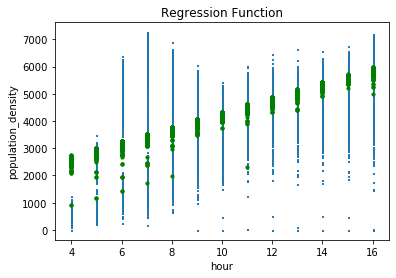

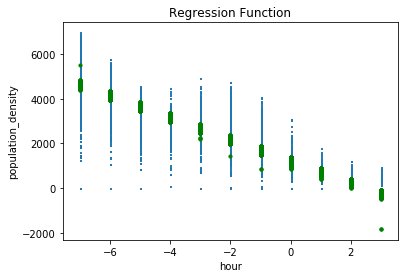

In [26]:
# visualize original data points
plt.scatter(RegA[['date_time']], RegA[['population_density']], marker = "s", s = 1) 

# visualize regression function
plt.scatter(XA['date_time'], y_predA, color="g", s = 10) 
plt.xlabel('hour') 
plt.ylabel('population_density') 
plt.title('Regression Function')
plt.show()

# visualize original data points
plt.scatter(RegB[['date_time']], RegB[['population_density']], marker = "s", s = 1) 

# visualize regression function
plt.scatter(XB['date_time'], y_predB, color="g", s = 10) 
plt.xlabel('hour') 
plt.ylabel('population_density') 
plt.title('Regression Function')
plt.show()

   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

Mean squared error for RegA:
2073008.954533398
Mean squared error for RegA:
1102.2684266274562
[3389.66093581 5670.03746365 4152.87018942 ... 3771.42013709 2597.15135932
 3027.27579702]


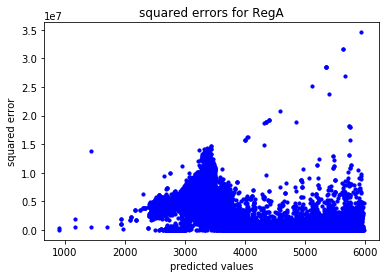

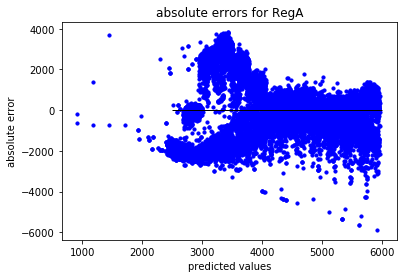

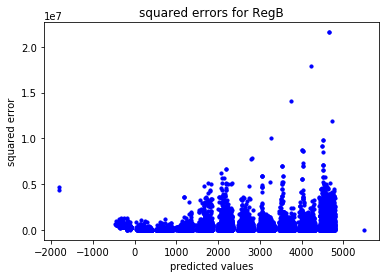

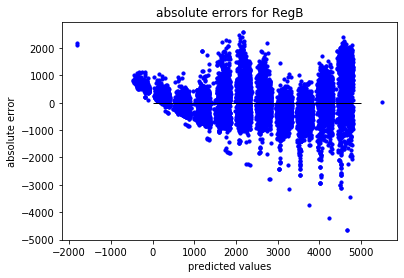

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# TODO: "with respect to the original, non-sampled data set"?!
# TODO: median squared error

print("Mean squared error for RegA:")
print(mean_squared_error(RegA['population_density'], y_predA))
print("Mean squared error for RegA:")
print(mean_absolute_error(RegA['population_density'], y_predA))

print(y_predA)

plt.scatter(y_predA.ravel(), (RegA['population_density'] - y_predA.ravel()) ** 2, color = "blue", s = 10,) 
plt.title("squared errors for RegA")
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_predA.ravel(), (RegA['population_density'] - y_predA.ravel()), color = "blue", s = 10,) 
plt.hlines(y = 0, xmin = 2500, xmax = 6000, linewidth = 1) 
plt.title("absolute errors for RegA")
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

plt.scatter(y_predB.ravel(), (RegB['population_density'] - y_predB.ravel()) ** 2, color = "blue", s = 10,) 
plt.title("squared errors for RegB")
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_predB.ravel(), (RegB['population_density'] - y_predB.ravel()), color = "blue", s = 10,) 
plt.hlines(y = 0, xmin = 0, xmax = 5000, linewidth = 1) 
plt.title("absolute errors for RegB")
plt.xlabel('predicted values')
plt.ylabel('absolute error')
plt.show()

   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation: 

## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [28]:
# TODO: what are they referring to with "extracted dataset"?
data = data_preprocessed.copy()

# drop unwanted columns
data = data.drop(columns=['weather_type', 'weather_type_details', 'population_density'])

def drop_date(date):
    # works for this dataset, since all dates have the
    # same format of MM/dd/yyyy hh:mm
    return int(date.split(" ")[1].split(":")[0])
data['date_time'] = data['date_time'].apply(drop_date)

   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [30]:
# only numerical inputs work, so map categorical columns to numeric values
# TODO: evaluate label vs one-hot encoding

# label encoding
'''
data["population_density_categorical"] = data["population_density_categorical"].astype("category")
data["holiday"] = data["holiday"].astype("category")
print("population_density_categorical mapping:")
print(data["population_density_categorical"].cat.categories)
print("holiday mapping:")
print(data["holiday"].cat.categories)

# convert all categorical columns to their codes
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
'''

# one-hot encoding
one_hot_holidays = pd.get_dummies(data['holiday'],prefix="holiday")
data = pd.concat([data, one_hot_holidays], axis=1)
data.drop(['holiday'],axis=1, inplace=True)
data

KeyError: 'holiday'

TODO: explanation

Explanation:


   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [31]:
# TODO: industry standard blablalb
# TODO: blabla talk about under/overfitting
from sklearn.model_selection import train_test_split
svmTrain, svmTest = train_test_split(data, test_size=0.33, random_state=0)
print(svmTrain.shape)
print(svmTest.shape)

(29067, 18)
(14317, 18)


Explanation:


   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [32]:
from sklearn.svm import SVC

target = "population_density_categorical"
features = data.columns.tolist()
features.remove(target)
X = svmTrain[features]
y = svmTrain[target]
svmTestX = svmTest[features]
svmTestY = svmTest[target]

classifierLinear = SVC(C=10, kernel='linear')
classifierLinear.fit(X, y)
classifierRbf = SVC(C=1, kernel='rbf')
classifierRbf.fit(X, y)
classifierLinearBad = SVC(C=0.001, kernel='linear')
classifierLinearBad.fit(X, y)

/home/ha2/anaconda2/envs/ids/lib/python3.8/site-packages/sklearn/svm/base.py:189: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [33]:
# Your code:
from sklearn.metrics import classification_report
print('Evaluation of SVM with linear kernel, C = 10:')
predLinear = classifierLinear.predict(svmTestX)
print('Accuracy: \n', classifierLinear.score(svmTestX, svmTestY), '\n')
print('Classification Report: \n', classification_report(svmTestY, predLinear), '\n')

print('Evaluation of SVM with rbf kernel, C = 1:')
predRbf = classifierRbf.predict(svmTestX)
print('Accuracy: \n', classifierRbf.score(svmTestX, svmTestY), '\n')
print('Classification Report: \n', classification_report(svmTestY, predRbf), '\n')

print('Evaluation of SVM with linear kernel, C = 0.001:')
predLinearBad = classifierLinearBad.predict(svmTestX)
print('Accuracy: \n', classifierLinearBad.score(svmTestX, svmTestY), '\n')
print('Classification Report: \n', classification_report(svmTestY, predLinearBad), '\n')  

Evaluating SVM with linear kernel, C = 10:
Accuracy: 
 0.5548648459872878 



/home/ha2/anaconda2/envs/ids/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


Classification Report: 
               precision    recall  f1-score   support

        high       0.62      0.68      0.65      4041
         low       0.40      0.33      0.36      2193
      medium       0.35      0.36      0.35      2680
   very high       0.00      0.00      0.00      1423
    very low       0.65      0.88      0.75      3980

    accuracy                           0.55     14317
   macro avg       0.41      0.45      0.42     14317
weighted avg       0.48      0.55      0.51     14317
 

Evaluating SVM with rbf kernel, C = 1:
Accuracy: 
 0.6651533142418105 

Classification Report: 
               precision    recall  f1-score   support

        high       0.60      0.78      0.68      4041
         low       0.64      0.51      0.57      2193
      medium       0.63      0.34      0.44      2680
   very high       0.50      0.54      0.52      1423
    very low       0.82      0.90      0.86      3980

    accuracy                           0.67     14317
   macr

/home/ha2/anaconda2/envs/ids/lib/python3.8/site-packages/sklearn/metrics/classification.py:1436: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  precision = _prf_divide(tp_sum, pred_sum,


Classification Report: 
               precision    recall  f1-score   support

        high       0.60      0.74      0.66      4041
         low       0.44      0.26      0.33      2193
      medium       0.35      0.40      0.38      2680
   very high       0.00      0.00      0.00      1423
    very low       0.70      0.88      0.78      3980

    accuracy                           0.57     14317
   macro avg       0.42      0.46      0.43     14317
weighted avg       0.50      0.57      0.52     14317
 



   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation: TODO

## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [ ]:
data = data_preprocessed.copy()

# Your code:



Explanation:


   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:


In [ ]:
# Your code:



   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:


In [ ]:
# Your code:



   (d) Train your network with default hyperparameters and return the parameters.

In [ ]:
# Your code:



   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [ ]:
# Your code: (number of hidden layers)



In [ ]:
# Your code: (number of nodes in the hidden layer)



In [ ]:
# Your code: (optimized network) 



Explanation:


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [ ]:
# Your code: (linear activation function):



In [ ]:
# Your code: (non-linear activation function):



Explanation:


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the training data



- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [ ]:
# Your code for the confusion matrices on the test data



- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [ ]:
# Your code for precision, recall and F1-scores on the test data



- Accuracy scores on training and test data (give explicitly the result for each fold)

In [ ]:
# Your code for accuracy scores on training and test data



In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:
